#  MACHINE LEARNING: Portugal Wine under Two Class approach for Quality classification with Logistic Regression using R and K fold cross-validation
# Module 2: Solving Project with Original Dataset (df)

By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | October 25, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
<hr>

# I Introduction

We consider the original dataset (wine) and we get ride off the variables "density" and "free.sulfor.dioxide" becouse they may cause problems of collinearity that can affect the normal operation of the algorithms since we are in the presence of double information.

As a consequence, we obtain the file "<b>df</b>" that goes on to represent the base with the original data pre-processed in a format ready to be used in the modeling.

# II Loading and the Data

In [117]:
# first remove ALL objects and close all possible connections
closeAllConnections()
rm(list = ls(all = TRUE)) # Does remove all inclusive hidden

# see your memory size
memory.size() 

In [49]:
# install packages and load libraries
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = c("Depends", "Suggests"))
    sapply(pkg, require, character.only = TRUE)
}
# usage
packages <- c("plyr", "dplyr", "car", "caret")
ipak(packages)


plyr dplyr   car caret 
 TRUE  TRUE  TRUE  TRUE

In [2]:
# define path location of datasets
wine1.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine2.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# read datasets
wine1 <- read.csv(wine1.url, header=TRUE, sep=';')
wine2 <- read.csv(wine2.url, header=TRUE, sep=';')

# create dataset base
paso <- rbind(cbind(wine1, Class='white'), cbind(wine2, Class='red'))
paso$quality<- ifelse(paso$quality>=6, "Good", ifelse(paso$quality<6, "Bad", NA))

df= subset(paso, select=c('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides' ,'total.sulfur.dioxide','pH', 'sulphates', 'alcohol', 'quality', 'Class'))
attach(df)
head(df)
rm("paso", "wine1", "wine2")

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,Good,white
6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,Good,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,Good,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,Good,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,Good,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,Good,white


In [3]:
# verify response variable "quality" as factor
df$quality <- as.factor(df$quality)
df$Class <- as.factor(df$Class)

In [5]:
# get some information about the dataset
str(df)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 2 2 2 2 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


# III Getting train and test datasets

In [27]:
#stratified sampling to get the train and test dataset
set.seed(7) # Set Seed so that same sample can be reproduced in future also
# considering response variable as strata
data_part <- createDataPartition(y = df$quality ,  p = 0.70, list = F)
testing <- df[-data_part,] # 30% data goes here
training <- df[data_part,] # 70% here

In [26]:
#taking a look of the train and test dataset by columns 
head(training)
head(testing)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
2,6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,Good,white
3,8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,Good,white
4,7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,Good,white
5,7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,Good,white
8,7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,Good,white
9,6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,Good,white


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
1,7.0,0.27,0.36,20.70,0.045,170,3.00,0.45,8.8,Good,white
6,8.1,0.28,0.40,6.90,0.050,97,3.26,0.44,10.1,Good,white
7,6.2,0.32,0.16,7.00,0.045,136,3.18,0.47,9.6,Good,white
11,8.1,0.27,0.41,1.45,0.033,63,2.99,0.56,12.0,Bad,white
12,8.6,0.23,0.40,4.20,0.035,109,3.14,0.53,9.7,Bad,white
19,7.4,0.34,0.42,1.10,0.033,171,3.12,0.53,11.3,Good,white


In [27]:
# get some information about training dataset
str(training[,1:11])

'data.frame':	4549 obs. of  11 variables:
 $ fixed.acidity       : num  6.3 8.1 7.2 7.2 7 6.3 8.1 7.9 6.6 8.3 ...
 $ volatile.acidity    : num  0.3 0.28 0.23 0.23 0.27 0.3 0.22 0.18 0.16 0.42 ...
 $ citric.acid         : num  0.34 0.4 0.32 0.32 0.36 0.34 0.43 0.37 0.4 0.62 ...
 $ residual.sugar      : num  1.6 6.9 8.5 8.5 20.7 ...
 $ chlorides           : num  0.049 0.05 0.058 0.058 0.045 0.049 0.044 0.04 0.044 0.04 ...
 $ total.sulfur.dioxide: num  132 97 186 186 170 132 129 75 143 172 ...
 $ pH                  : num  3.3 3.26 3.19 3.19 3 3.3 3.22 3.18 3.54 2.98 ...
 $ sulphates           : num  0.49 0.44 0.4 0.4 0.45 0.49 0.45 0.63 0.52 0.67 ...
 $ alcohol             : num  9.5 10.1 9.9 9.9 8.8 9.5 11 10.8 12.4 9.7 ...
 $ quality             : Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 2 1 2 1 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


In [28]:
# get some information about testing dataset
str(testing[,1:11])

'data.frame':	1948 obs. of  11 variables:
 $ fixed.acidity       : num  7 8.1 6.2 8.1 8.6 7.4 6.5 7 7.4 8.5 ...
 $ volatile.acidity    : num  0.27 0.28 0.32 0.27 0.23 0.34 0.31 0.25 0.27 0.24 ...
 $ citric.acid         : num  0.36 0.4 0.16 0.41 0.4 0.42 0.14 0.32 0.48 0.39 ...
 $ residual.sugar      : num  20.7 6.9 7 1.45 4.2 1.1 7.5 9 1.1 10.4 ...
 $ chlorides           : num  0.045 0.05 0.045 0.033 0.035 0.033 0.044 0.046 0.047 0.044 ...
 $ total.sulfur.dioxide: num  170 97 136 63 109 171 133 245 132 142 ...
 $ pH                  : num  3 3.26 3.18 2.99 3.14 3.12 3.22 3.25 3.19 3.2 ...
 $ sulphates           : num  0.45 0.44 0.47 0.56 0.53 0.53 0.5 0.5 0.49 0.53 ...
 $ alcohol             : num  8.8 10.1 9.6 12 9.7 11.3 9.5 10.4 11.6 10 ...
 $ quality             : Factor w/ 2 levels "Bad","Good": 2 2 2 1 1 2 1 2 2 2 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


In [5]:
#summarize full dataset by columns 
propmiss <- function(dataframe) {
	m <- sapply(dataframe, function(x) {
		data.frame(
			n=length(!is.na(x)), 
			nmiss=sum(is.na(x)), 
			propmiss=sum(is.na(x))/length(x),
			P25=round(quantile(x, 0.25, na.rm=TRUE),2),
			P75=round(quantile(x, 0.75, na.rm=TRUE),2),            
			IQR=round(IQR(x, na.rm=TRUE),2),
			Threshold= round(quantile(x, 0.75, na.rm=TRUE),2) + 1.5*round(IQR(x, na.rm=TRUE),2),            
			Minimum=round(min(x, na.rm=TRUE),2),
			Median=round(median(x, na.rm=TRUE),2),            
			Maximum=round(max(x, na.rm=TRUE),2),
			Range=round(max(x, na.rm=TRUE)-min(x, na.rm=TRUE),2),
			Mean=round(mean(x, na.rm=TRUE),2),
			StDev=round(sd(x, na.rm=TRUE),2)
		)
	})
	d <- data.frame(t(m))
	d <- sapply(d, unlist)
	d <- as.data.frame(d)
	d$variable <- row.names(d)
	row.names(d) <- NULL
	d <- cbind(d[ncol(d)],d[-ncol(d)])
	return(d[order(d$propmiss), ])
}

In [30]:
# summarize training dataset
(summary=propmiss(training[,-c(10:11)])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,4549,6.40,7.70,1.30,3.80,7.00,15.90,12.10,7.22,1.30
volatile.acidity,4549,0.23,0.41,0.18,0.08,0.29,1.58,1.50,0.34,0.17
citric.acid,4549,0.25,0.39,0.14,0.00,0.31,1.66,1.66,0.32,0.15
residual.sugar,4549,1.80,8.00,6.20,0.60,2.90,65.80,65.20,5.38,4.76
chlorides,4549,0.04,0.06,0.03,0.01,0.05,0.61,0.60,0.06,0.04
total.sulfur.dioxide,4549,77.00,156.00,79.00,6.00,118.00,344.00,338.00,115.56,56.82
pH,4549,3.11,3.32,0.21,2.72,3.21,4.01,1.29,3.22,0.16
sulphates,4549,0.43,0.60,0.17,0.25,0.51,2.00,1.75,0.53,0.15
alcohol,4549,9.50,11.30,1.80,8.00,10.40,14.90,6.90,10.51,1.20


In [31]:
# summarize testing dataset
(summary=propmiss(testing[,-c(10:11)])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,1948,6.40,7.70,1.30,4.40,7.00,15.60,11.20,7.21,1.30
volatile.acidity,1948,0.23,0.40,0.17,0.08,0.29,1.33,1.25,0.34,0.16
citric.acid,1948,0.24,0.39,0.15,0.00,0.31,1.00,1.00,0.32,0.15
residual.sugar,1948,1.80,8.30,6.50,0.70,3.30,31.60,30.90,5.58,4.76
chlorides,1948,0.04,0.06,0.03,0.01,0.05,0.42,0.41,0.06,0.03
total.sulfur.dioxide,1948,78.00,155.00,77.00,6.00,119.00,440.00,434.00,116.17,55.82
pH,1948,3.11,3.31,0.20,2.74,3.20,4.01,1.27,3.22,0.16
sulphates,1948,0.43,0.59,0.16,0.22,0.50,1.95,1.73,0.53,0.15
alcohol,1948,9.50,11.30,1.80,8.40,10.20,14.00,5.60,10.45,1.19


# IV Logistic Regression
 
In this project I have considered Logistic Regression algorithm. I use "set.seed(7)" so that same sample can be reproduced in the future and also it ensures the results are directly comparable.

## 41 Building Machine Learning Model

### 411 Find model equation 

In [39]:
## full model
names(training)
model1<- glm(quality ~ ., data=training, family="binomial")
summary(model1)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "total.sulfur.dioxide"
 [7] "pH"                   "sulphates"            "alcohol"             
[10] "quality"              "Class"


Call:
glm(formula = quality ~ ., family = "binomial", data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2864  -0.9007   0.4268   0.8137   2.6775  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -9.461651   1.137946  -8.315  < 2e-16 ***
fixed.acidity        -0.058665   0.039970  -1.468  0.14218    
volatile.acidity     -4.929850   0.344870 -14.295  < 2e-16 ***
citric.acid          -0.287698   0.311363  -0.924  0.35549    
residual.sugar        0.060079   0.009037   6.648 2.98e-11 ***
chlorides            -2.093816   1.217861  -1.719  0.08557 .  
total.sulfur.dioxide -0.002420   0.001016  -2.381  0.01725 *  
pH                    0.317089   0.282134   1.124  0.26106    
sulphates             1.646898   0.312352   5.273 1.35e-07 ***
alcohol               0.995744   0.044397  22.428  < 2e-16 ***
Classred              0.509386   0.196228   2.596  0.00943 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01

In [29]:
# VIF variable inflation factor for each variable in the model
vif(model1)

fixed.acidity     volatile.acidity          citric.acid 
            2.086016             2.339433             1.643929 
      residual.sugar            chlorides total.sulfur.dioxide 
            1.589493             1.582091             2.784321 
                  pH            sulphates              alcohol 
            1.621521             1.550315             1.429359 
               Class 
            5.602361

VIF >= 10 ==> variable is collinear and should be omitted from the model. 

So,  VIF < 6 for all variables ==> variables are ok and should be kept on the model. 

In [40]:
# best model Stepwise backward-AIC
model2<- step(glm(quality ~ ., family = binomial(link = "logit"), data=training), trace= F, direction="backward")
summary(model2)


Call:
glm(formula = quality ~ fixed.acidity + volatile.acidity + residual.sugar + 
    chlorides + total.sulfur.dioxide + sulphates + alcohol + 
    Class, family = binomial(link = "logit"), data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2620  -0.9042   0.4245   0.8193   2.6739  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.303121   0.583302 -14.235  < 2e-16 ***
fixed.acidity        -0.094429   0.032037  -2.948  0.00320 ** 
volatile.acidity     -4.829341   0.328449 -14.703  < 2e-16 ***
residual.sugar        0.058010   0.008905   6.514 7.31e-11 ***
chlorides            -2.542002   1.178236  -2.157  0.03097 *  
total.sulfur.dioxide -0.002408   0.001008  -2.390  0.01687 *  
sulphates             1.666107   0.309410   5.385 7.25e-08 ***
alcohol               0.995605   0.044196  22.527  < 2e-16 ***
Classred              0.604536   0.184351   3.279  0.00104 ** 
---
Signif. codes:  0 '***' 0.00

In [41]:
# VIF variable inflation factor for each variable in the model
vif(model2)

fixed.acidity     volatile.acidity       residual.sugar 
            1.342024             2.125804             1.548153 
           chlorides total.sulfur.dioxide            sulphates 
            1.484564             2.737655             1.512986 
             alcohol                Class 
            1.410771             4.941271

VIF >= 10 ==> variable is collinear and should be omitted from the model. 

So,  VIF < 6 for all variables ==> variables are ok and should be kept on the model. 

In [42]:
## best model Stepwise backward-BIC
model3<- step(glm(quality ~ ., family = binomial(link = "logit"), data=training), trace= F, direction="backward", k=log(nrow(training)))
summary(model3)


Call:
glm(formula = quality ~ fixed.acidity + volatile.acidity + residual.sugar + 
    sulphates + alcohol + Class, family = binomial(link = "logit"), 
    data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3414  -0.9036   0.4229   0.8226   2.7373  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -9.085228   0.528126 -17.203  < 2e-16 ***
fixed.acidity    -0.094676   0.032044  -2.955  0.00313 ** 
volatile.acidity -4.960178   0.326688 -15.183  < 2e-16 ***
residual.sugar    0.054498   0.008586   6.347 2.19e-10 ***
sulphates         1.380367   0.293379   4.705 2.54e-06 ***
alcohol           1.046091   0.041652  25.115  < 2e-16 ***
Classred          0.799835   0.149339   5.356 8.52e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5979.9  on 4548  degrees of freedom
Residual deviance: 4675.4  on 4542  degrees 

In [43]:
# VIF variable inflation factor for each variable in the model
vif(model3)

fixed.acidity volatile.acidity   residual.sugar        sulphates 
        1.343610         2.099039         1.450027         1.366848 
         alcohol            Class 
        1.247099         3.243948

VIF >= 10 ==> variable is collinear and should be omitted from the model. 

So,  VIF < 6 for all variables ==> variables are ok and should be kept on the model. 

As we can see, Model2 (backward-AIC) has achieved a lower AIC value (model2-AIC= 4683.1) being the best model according to the Stepwise method. Also, we can compare the models using the ANOVA test. Let's say our null hypothesis is that second model is better than the first model. p < 0.05 would reject our hypothesis and in case p > 0.05, we'll fail to reject the null hypothesis.

In [44]:
#compare the models by using anova-chisq
anova(model1,model2,test = "Chisq")
anova(model1,model3,test = "Chisq")
anova(model2,model3,test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4538,4662.857,NA,NA,NA
4540,4665.105,-2,-2.248035,0.3249715


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4538,4662.857,NA,NA,NA
4542,4675.350,-4,-12.49333,0.01403606


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4540,4665.105,NA,NA,NA
4542,4675.350,-2,-10.2453,0.00596021


In [48]:
#compare the models by using lrtest-chisq
library(lmtest)
lrtest(model1, model2)
lrtest(model1, model3)
lrtest(model2,model3)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
11,-2331.429,NA,NA,NA
9,-2332.553,-2,2.248035,0.3249715


#Df,LogLik,Df,Chisq,Pr(>Chisq)
11,-2331.429,NA,NA,NA
7,-2337.675,-4,12.49333,0.01403606


#Df,LogLik,Df,Chisq,Pr(>Chisq)
9,-2332.553,NA,NA,NA
7,-2337.675,-2,10.2453,0.00596021


With p > 0.05, both test (ANOVA and LRTEST) also corroborates the fact that the second model (model2) is the best model according to the Stepwise method.  So, we will keep model2 and we will evaluate its performance as a supervised machine learning model.  

### 412 Building the model 

In [15]:
## Control Resampling Technique: 10-fold CV
fiveStats = function(...) c (twoClassSummary(...), defaultSummary(...))
cvCtrl <- trainControl(method = "cv", number=10,  summaryFunction = fiveStats, classProbs = TRUE, savePredictions=T)

In [6]:
## Construction Predictive Model
set.seed(1)
formula2 <- as.formula("quality ~ fixed.acidity + volatile.acidity + residual.sugar + chlorides + total.sulfur.dioxide + sulphates + alcohol + Class")
lrmodel2 <- train(formula2, data=training, method="glm",   family=binomial(link = "logit"), preProc = c("center", "scale"), tuneLength = 5, trControl = cvCtrl)

In [7]:
## Getting summary of fitted model2
summary(lrmodel2)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2620  -0.9042   0.4245   0.8193   2.6739  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.76009    0.03864  19.669  < 2e-16 ***
fixed.acidity        -0.12231    0.04149  -2.948  0.00320 ** 
volatile.acidity     -0.80825    0.05497 -14.703  < 2e-16 ***
residual.sugar        0.27588    0.04235   6.514 7.31e-11 ***
chlorides            -0.09106    0.04221  -2.157  0.03097 *  
total.sulfur.dioxide -0.13685    0.05727  -2.390  0.01687 *  
sulphates             0.24694    0.04586   5.385 7.25e-08 ***
alcohol               1.19011    0.05283  22.527  < 2e-16 ***
Classred              0.26163    0.07978   3.279  0.00104 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5979.9  on 4548  degrees of freedom
Residual deviance: 4665.1  on 4540  degrees of freedom
AIC

In [9]:
## train results model2
lrmodel2

Generalized Linear Model 

4549 samples
   8 predictor
   2 classes: 'Bad', 'Good' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4095, 4094, 4094, 4094, 4094, 4094, ... 
Resampling results:

  ROC        Sens       Spec       Accuracy  Kappa    
  0.8041218  0.5889546  0.8430556  0.749834  0.4449785


In [10]:
## Test Set Results model2
lrPred2 <- predict(lrmodel2,testing, type="raw")
confusionMatrix(lrPred2, testing$quality, positive = "Good")

Confusion Matrix and Statistics

          Reference
Prediction  Bad Good
      Bad   419  220
      Good  296 1013
                                          
               Accuracy : 0.7351          
                 95% CI : (0.7149, 0.7546)
    No Information Rate : 0.633           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4169          
 Mcnemar's Test P-Value : 0.000961        
                                          
            Sensitivity : 0.8216          
            Specificity : 0.5860          
         Pos Pred Value : 0.7739          
         Neg Pred Value : 0.6557          
             Prevalence : 0.6330          
         Detection Rate : 0.5200          
   Detection Prevalence : 0.6720          
      Balanced Accuracy : 0.7038          
                                          
       'Positive' Class : Good            
                                          

In [11]:
## Predicting Class Probabilities model2
lrProbs2 <- predict(lrmodel2, testing, type = "prob")
head(lrProbs2)

,Bad,Good
1,0.51998628,0.4800137
6,0.39938201,0.6006180
7,0.53219328,0.4678067
11,0.08652178,0.9134782
12,0.44853184,0.5514682
19,0.25776898,0.7422310


In [12]:
# variable importance model2
lr.imp2 = varImp (lrmodel2 , scale = F )
lr.imp2

glm variable importance

                     Overall
alcohol               22.527
volatile.acidity      14.703
residual.sugar         6.514
sulphates              5.385
Classred               3.279
fixed.acidity          2.948
total.sulfur.dioxide   2.390
chlorides              2.157

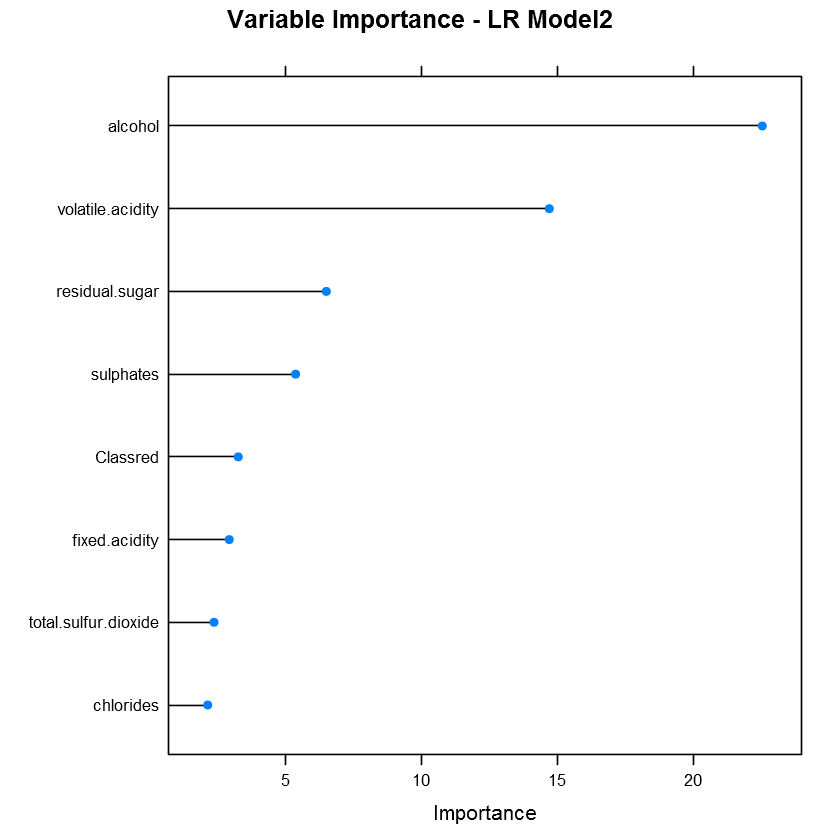

In [13]:
## Graphic variable importance model2
# dev.new()
plot(lr.imp2, top=8, main="Variable Importance - LR Model2")

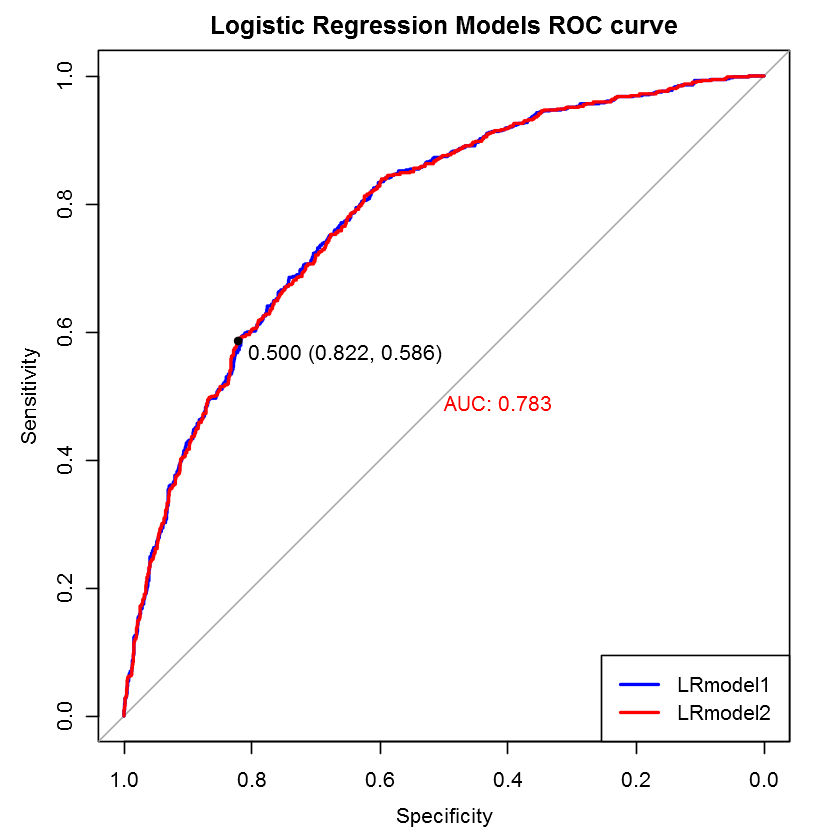

In [16]:
## Creating the ROC Curve
library(pROC)
formula1 <- as.formula("quality ~ .") 
lrmodel1 <- train(formula1, data=training, method="glm",   family=binomial(link = "logit"), preProc = c("center", "scale"), tuneLength = 5, trControl = cvCtrl)
lrProbs <- predict(lrmodel1, testing, type = "prob")

## Creating the ROC Curve
library(pROC)
lrROC <- roc(predictor = lrProbs$Good, response = testing$quality, levels = rev(levels(testing$quality)))
lrROC2 <- roc(predictor = lrProbs2$Good, response = testing$quality, levels = rev(levels(testing$quality)))

plot(lrROC, type = "S", main="Logistic Regression Models ROC curve",  col = "blue")
plot(lrROC2, add = TRUE, print.thres = .5, col = "red", print.auc=TRUE)
#plot(knnROC, add = TRUE, col = "yellow")
#plot(rfROC, add = TRUE, print.thres = .5, col = "blue", print.auc=TRUE)
legend("bottomright", legend = c("LRmodel1","LRmodel2"), col = c("blue","red"),lwd = 2)


## V Making predictions
 
After doing all the building stuff,  we want to get the predictions from model2 on our training dataset.

In [37]:
# print predictions probabilities by row model2
head(as.data.frame(lrProbs2),5)

,Bad,Good
1,0.51998628,0.4800137
6,0.39938201,0.6006180
7,0.53219328,0.4678067
11,0.08652178,0.9134782
12,0.44853184,0.5514682


In [38]:
# print validation dataset and predictions by row model2
head((val<-as.data.frame(c(testing,as.data.frame(lrPred2)))),10)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class,lrPred2
7.0,0.27,0.36,20.70,0.045,170,3.00,0.45,8.8,Good,white,Bad
8.1,0.28,0.40,6.90,0.050,97,3.26,0.44,10.1,Good,white,Good
6.2,0.32,0.16,7.00,0.045,136,3.18,0.47,9.6,Good,white,Bad
8.1,0.27,0.41,1.45,0.033,63,2.99,0.56,12.0,Bad,white,Good
8.6,0.23,0.40,4.20,0.035,109,3.14,0.53,9.7,Bad,white,Good
7.4,0.34,0.42,1.10,0.033,171,3.12,0.53,11.3,Good,white,Good
6.5,0.31,0.14,7.50,0.044,133,3.22,0.50,9.5,Bad,white,Bad
7.0,0.25,0.32,9.00,0.046,245,3.25,0.50,10.4,Good,white,Good
7.4,0.27,0.48,1.10,0.047,132,3.19,0.49,11.6,Good,white,Good
8.5,0.24,0.39,10.40,0.044,142,3.20,0.53,10.0,Good,white,Good


Now if you want to get the predictions from a new test data, you can see the item 7.4 of my project [MACHINE LEARNING: A comparison of supervised learning algorithms applied to the classification problem with caret R-project library](http://nbviewer.jupyter.org/github/arqmain/Machine_Learning/blob/master/R_MLearning/MLearning_Classification_Comparison_R_Caret/MLearning_Classification_Comparison_R_Caret.ipynb). 

## VI Conclusion

This module of the project develops Logistic Regression algorithm of machine learning to classify the quality of the wine "Good" or "Bad" according to the 11 variables that characterize the wine subject to classification.

The database -df- does not consider two variables that appear in the original base. They could generate a problem of multicollinearity in the process of classification. So, we got rid of them in df.

The lrmodel2 achieves a good classification metric, reaching ROC measurement of 80.42%. That is, the variables of the "df" database allow discriminating in a good way the quality of wine that they represent.

The model was developed selecting the variables included by using the stepwise backward elimination method based on AIC selection criterion. Anyway, this is modeling so, we may improve more or not the model by filtering other variables, incorporating variable's interactions or using another variable's selection method.

<hr>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | October 25, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]